## Importing Libraries

In [ ]:
!pip install catboost

In [ ]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.3.1

In [ ]:
!pip install imblearn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

## Reading The Dataset

In [5]:
# Loading the dataset
file_path = './WA_Fn-UseC_-Telco-Customer-Churn.csv'

data = pd.read_csv(file_path)
print(f'dataset contains {data.shape[0]} rows and {data.shape[1]} columns')

dataset contains 7043 rows and 21 columns


In [6]:
data.head(10)

,customerID,gender,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Dual,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [7]:
data.tail()

,customerID,gender,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Dual,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


## Get Information about the dataset:

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         7043 non-null   object 
 1   gender             7043 non-null   object 
 2   Senior_Citizen     7043 non-null   int64  
 3   Is_Married         7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   Phone_Service      7043 non-null   object 
 7   Dual               7043 non-null   object 
 8   Internet_Service   7043 non-null   object 
 9   Online_Security    7043 non-null   object 
 10  Online_Backup      7043 non-null   object 
 11  Device_Protection  7043 non-null   object 
 12  Tech_Support       7043 non-null   object 
 13  Streaming_TV       7043 non-null   object 
 14  Streaming_Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless_Billing  7043 

## Coverting Some of the Object Datatype Columns to Numerical

In [9]:
# Total_charges column should be of numerical type
data['Total_Charges'] = data['Total_Charges'].apply(pd.to_numeric, errors='coerce') # invalid parsing will be set as NaN

## Checking Null Values

In [10]:
data.isnull().sum()

,0
customerID,0
gender,0
Senior_Citizen,0
Is_Married,0
Dependents,0
tenure,0
Phone_Service,0
Dual,0
Internet_Service,0
Online_Security,0


In [11]:
# Check rows where Total_Charges is NaN
nan_rows = data[data['Total_Charges'].isna()]
print(nan_rows)

      customerID  gender  Senior_Citizen  Is_Married Dependents  tenure  \
488   4472-LVYGI  Female                0        Yes        Yes       0   
753   3115-CZMZD    Male                0         No        Yes       0   
936   5709-LVOEQ  Female                0        Yes        Yes       0   
1082  4367-NUYAO    Male                0        Yes        Yes       0   
1340  1371-DWPAZ  Female                0        Yes        Yes       0   
3331  7644-OMVMY    Male                0        Yes        Yes       0   
3826  3213-VVOLG    Male                0        Yes        Yes       0   
4380  2520-SGTTA  Female                0        Yes        Yes       0   
5218  2923-ARZLG    Male                0        Yes        Yes       0   
6670  4075-WKNIU  Female                0        Yes        Yes       0   
6754  2775-SEFEE    Male                0         No        Yes       0   

     Phone_Service              Dual Internet_Service      Online_Security  \
488             No  N

In [12]:
# Due to the dataset being big i decided to drop the rows

# Drop rows with NaN in the 'Total_Charges' column
data = data.dropna(subset=['Total_Charges'])

In [13]:
data['Total_Charges'].isnull().sum()

0

## Checking Duplicates


In [14]:
data_dup = data.duplicated().any()
print(data_dup)
# data.drop_duplicates()

False


## Overall statistics about the dataset

In [15]:
data.describe()

,Senior_Citizen,tenure,Monthly_Charges,Total_Charges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Splitting the Dataset into Features and a Target

In [16]:
X = data.iloc[:, 1:-1] # Excluding the customerid and the churn
y = data.iloc[:, -1] # Churn

In [17]:
print(X.shape)
print(y.shape)

(7032, 19)
(7032,)


In [18]:
X.head(5)

,gender,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Dual,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [19]:
y.head(5)

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


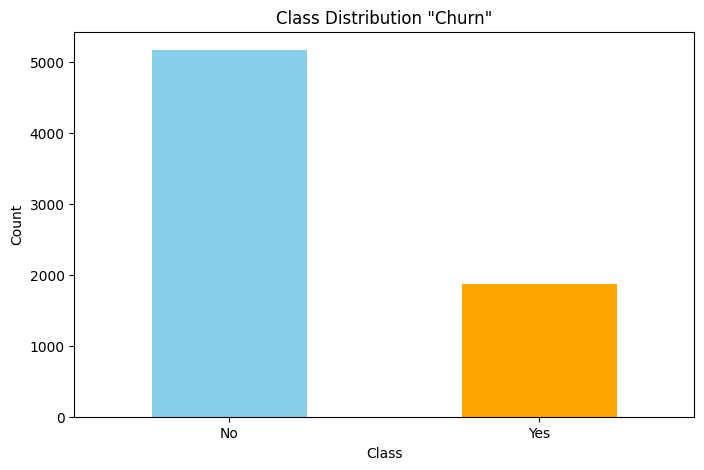

In [20]:
# Get the count of each class
class_counts = y.value_counts() # Counts of unique values

# Plot the counts as a bar chart
plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution "Churn"')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

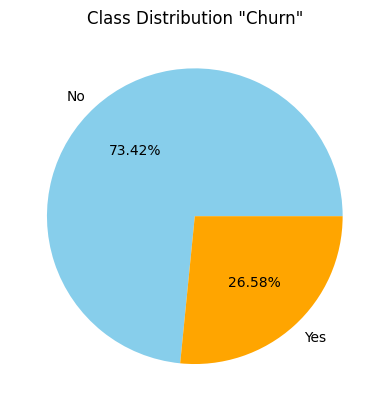

In [21]:
class_counts.plot.pie(autopct='%1.2f%%', colors=['skyblue', 'orange'])
plt.title('Class Distribution "Churn"')
plt.ylabel('')
plt.show()
# Looks Like an Imbalanced Dataset

## Encoding Categorical Data

In [22]:
# Checking unique values to choose which technique to apply
should_be_one_hot_encoded = []
should_be_label_encoded = []

for col in X.columns:
    if X[col].dtypes == 'object': # Exclude numerical values
        print(f'{col}: {X[col].unique()}')
        if len(X[col].unique()) > 2:
            should_be_one_hot_encoded.append(col)
        else:
            should_be_label_encoded.append(col)

print('\nOne-Hot Encoded : ', should_be_one_hot_encoded, '\n')
print('Label Encoded : ', should_be_label_encoded)

gender: ['Female' 'Male']
Is_Married: ['Yes' 'No']
Dependents: ['No' 'Yes']
Phone_Service: ['No' 'Yes']
Dual: ['No phone service' 'No' 'Yes']
Internet_Service: ['DSL' 'Fiber optic' 'No']
Online_Security: ['No' 'Yes' 'No internet service']
Online_Backup: ['Yes' 'No' 'No internet service']
Device_Protection: ['No' 'Yes' 'No internet service']
Tech_Support: ['No' 'Yes' 'No internet service']
Streaming_TV: ['No' 'Yes' 'No internet service']
Streaming_Movies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
Paperless_Billing: ['Yes' 'No']
Payment_Method: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

One-Hot Encoded :  ['Dual', 'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Contract', 'Payment_Method'] 

Label Encoded :  ['gender', 'Is_Married', 'Dependents', 'Phone_Service', 'Paperless_Billing']


### Apply Label Encoding


In [23]:
le = LabelEncoder()
for col in should_be_label_encoded:
    X[col] = le.fit_transform(X[col]) # Apply label encoding for each column

for col in should_be_label_encoded:
    print(f'{col}: {X[col].unique()}')

gender: [0 1]
Is_Married: [1 0]
Dependents: [0 1]
Phone_Service: [0 1]
Paperless_Billing: [1 0]


In [24]:
# Label Encoding the Target
y = le.fit_transform(y)
print(y)

[0 0 1 ... 0 1 0]


### Apply One-Hot Encoding

In [25]:
# Get the indexes of columns to transform
hot_encode_indexes = X.columns.get_indexer(should_be_one_hot_encoded)
print(hot_encode_indexes)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), hot_encode_indexes)], remainder='passthrough')
# Fit and transform the data
X_transformed = np.array(ct.fit_transform(X))
print(X_transformed)

[ 6  7  8  9 10 11 12 13 14 16]
[[0.0000e+00 1.0000e+00 0.0000e+00 ... 1.0000e+00 2.9850e+01 2.9850e+01]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 5.6950e+01 1.8895e+03]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 1.0000e+00 5.3850e+01 1.0815e+02]
 ...
 [0.0000e+00 1.0000e+00 0.0000e+00 ... 1.0000e+00 2.9600e+01 3.4645e+02]
 [0.0000e+00 0.0000e+00 1.0000e+00 ... 1.0000e+00 7.4400e+01 3.0660e+02]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 1.0000e+00 1.0565e+02 6.8445e+03]]


In [26]:
# Get the feature names for the one-hot encoded columns
encoder = ct.transformers_[0][1]  # The encoder used for one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(input_features=should_be_one_hot_encoded)

# Create a DataFrame with the transformed data
# Concatenate the new one-hot encoded feature names and original columns that weren't transformed
X_transformed_df = pd.DataFrame(X_transformed, columns=np.concatenate([encoded_feature_names, X.columns.difference(should_be_one_hot_encoded)]))

# Show the resulting DataFrame
print(X_transformed_df)

      Dual_No  Dual_No phone service  Dual_Yes  Internet_Service_DSL  \
0         0.0                    1.0       0.0                   1.0   
1         1.0                    0.0       0.0                   1.0   
2         1.0                    0.0       0.0                   1.0   
3         0.0                    1.0       0.0                   1.0   
4         1.0                    0.0       0.0                   0.0   
...       ...                    ...       ...                   ...   
7027      0.0                    0.0       1.0                   1.0   
7028      0.0                    0.0       1.0                   0.0   
7029      0.0                    1.0       0.0                   1.0   
7030      0.0                    0.0       1.0                   0.0   
7031      1.0                    0.0       0.0                   0.0   

      Internet_Service_Fiber optic  Internet_Service_No  Online_Security_No  \
0                              0.0                  0.0 

## Feature Selection Using Correlation

<Figure size 1500x800 with 0 Axes>

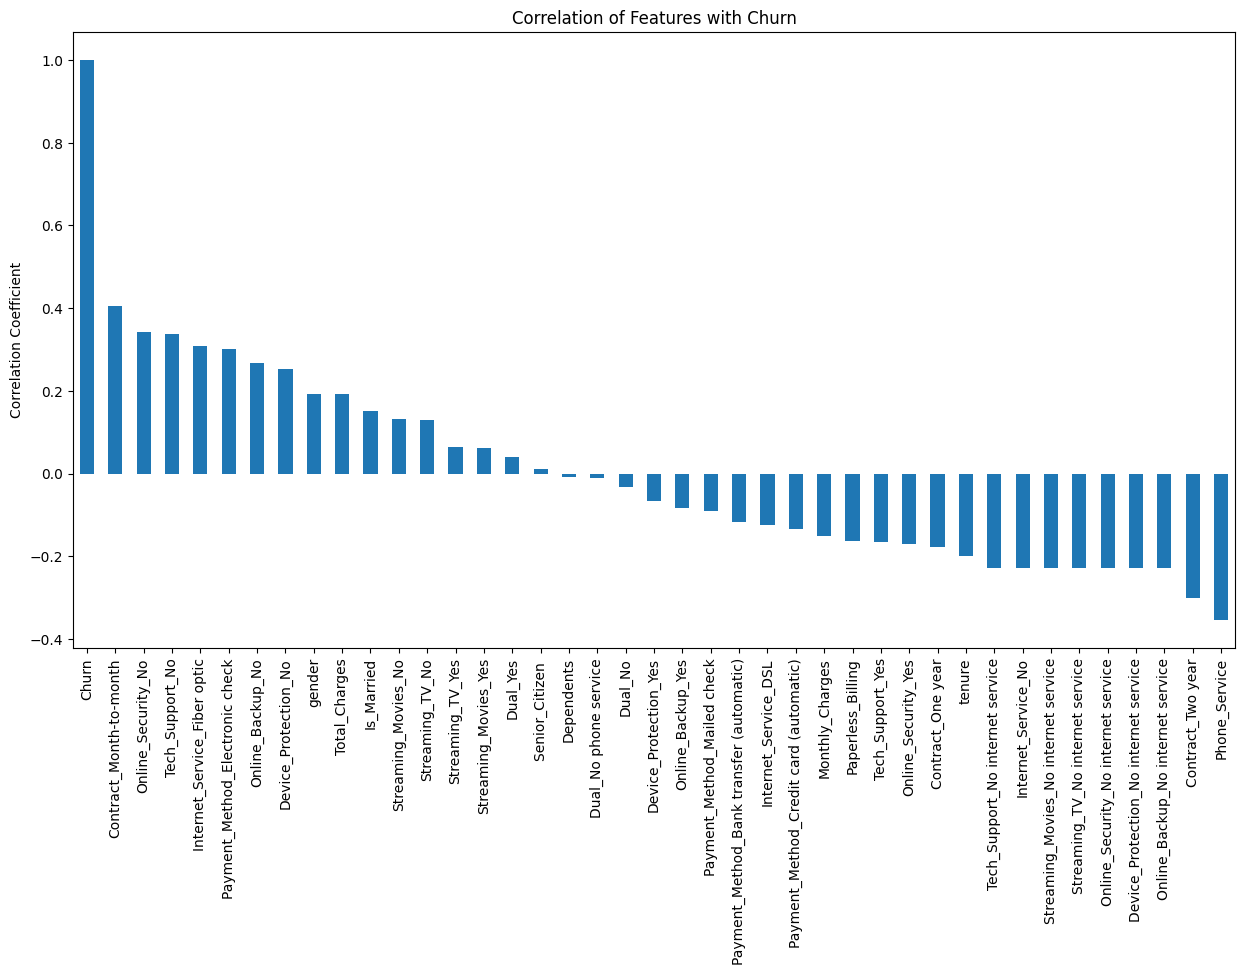

In [27]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
y_df = pd.DataFrame(y, columns=['Churn'])

# Concatenate the feature DataFrame and the target DataFrame
new_df = pd.concat([X_transformed_df, y_df], axis=1)

# Calculate correlations with the 'Churn' column
correlation = new_df.corr()['Churn'].sort_values(ascending=False)

# Plot the correlation of Churn with other variables
plt.figure(figsize=(15, 8))
correlation.plot(kind='bar')
plt.title("Correlation of Features with Churn")
plt.ylabel("Correlation Coefficient")
plt.show()

## Feature Selection Using RandomForest

[0.0134645  0.00362119 0.01211903 0.01114978 0.02472343 0.00236605
 0.02996051 0.00290799 0.01045103 0.0183466  0.00095171 0.0115077
 0.01623842 0.00317968 0.01109489 0.03035744 0.00331088 0.01148571
 0.01093526 0.00247654 0.01134598 0.01143882 0.00173175 0.01090508
 0.05363645 0.00967561 0.01567628 0.01177007 0.01208563 0.02799879
 0.01081188 0.02810681 0.02097648 0.02340859 0.01894302 0.15290328
 0.00322414 0.02444555 0.14982801 0.17043944]


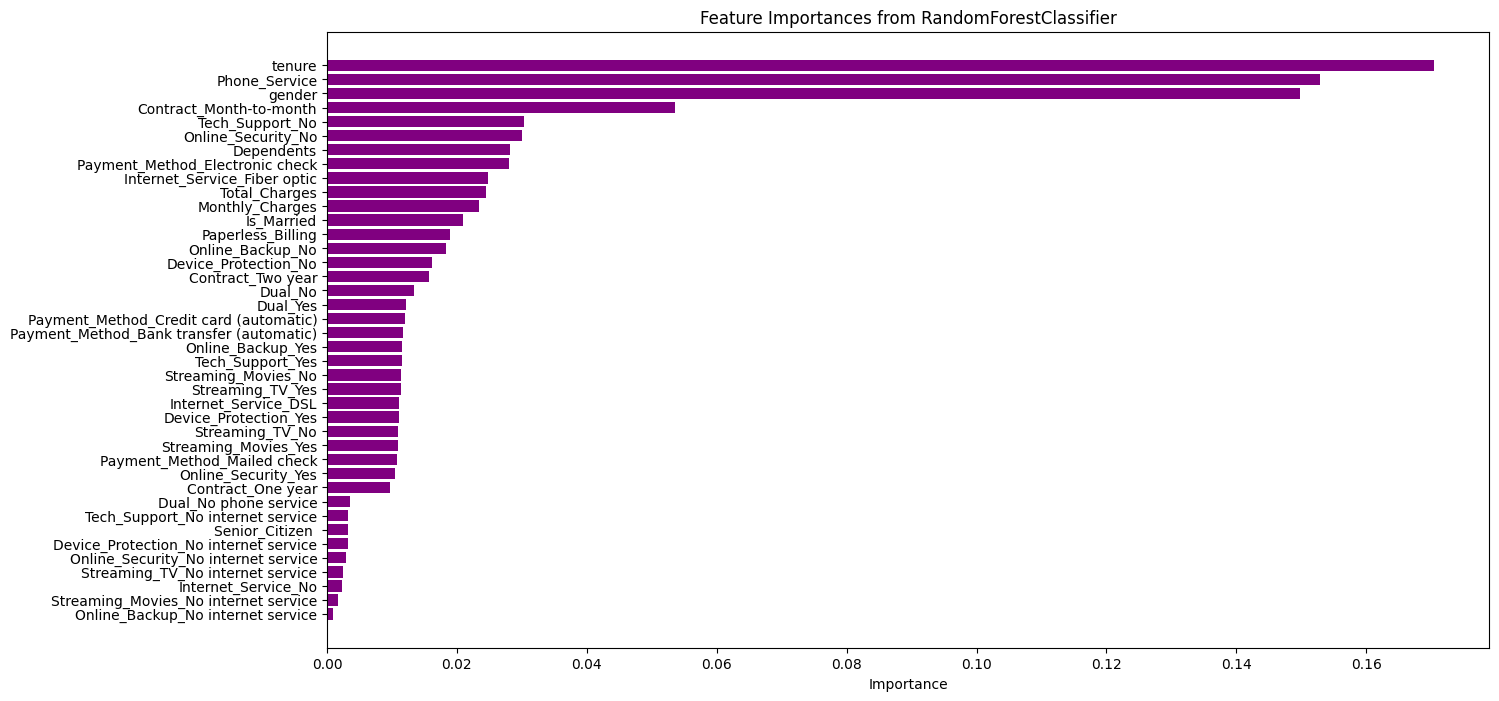

In [28]:
# Dataset has mixed values between numerical and categorical so its best to use randomforest rather than correlation matrix or chi-square
model = RandomForestClassifier()
model.fit(X_transformed, y)

# Get feature importances
importances = model.feature_importances_
print(importances)

# Create a DataFrame to store feature names and their importances
features_df = pd.DataFrame({
    'Feature': X_transformed_df.columns,
    'Importance': importances
})

# Sort the features by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=True)


# Plot the feature importances
plt.figure(figsize=(15, 8))
plt.barh(features_df['Feature'], features_df['Importance'], color='purple')
plt.xlabel('Importance')
plt.title('Feature Importances from RandomForestClassifier')
plt.show()

## Keeping High-Correlated Features Only

In [29]:
number_of_features = 15 # Take highest 15 features
filtered_features = []
for feature in features_df.tail(number_of_features).Feature:
    print(feature)
    filtered_features.append(feature)

for feature in X_transformed_df.columns:
    if feature not in filtered_features:
        X_transformed_df = X_transformed_df.drop(feature, axis=1)

print(X_transformed_df)

Online_Security_Yes
Payment_Method_Mailed check
Streaming_Movies_Yes
Streaming_TV_No
Device_Protection_Yes
Internet_Service_DSL
Streaming_TV_Yes
Streaming_Movies_No
Tech_Support_Yes
Online_Backup_Yes
Payment_Method_Bank transfer (automatic)
Payment_Method_Credit card (automatic)
Dual_Yes
Dual_No
Contract_Two year
Device_Protection_No
Online_Backup_No
Paperless_Billing
Is_Married
Monthly_Charges
Total_Charges
Internet_Service_Fiber optic
Payment_Method_Electronic check
Dependents
Online_Security_No
Tech_Support_No
Contract_Month-to-month
gender
Phone_Service
tenure
      Dual_No  Dual_Yes  Internet_Service_DSL  Internet_Service_Fiber optic  \
0         0.0       0.0                   1.0                           0.0   
1         1.0       0.0                   1.0                           0.0   
2         1.0       0.0                   1.0                           0.0   
3         0.0       0.0                   1.0                           0.0   
4         1.0       0.0           

 ## Splitting the dataset into the Training and Test sets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X_transformed_df), y, test_size=0.2, random_state=42)

## Feature Scaling

In [31]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Perform UnderSampling

In [32]:
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=42)
# X_train, y_train = rus.fit_resample(X_train, y_train)

## Perform OverSampling

In [33]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

## Perform UnderOverSampling

In [34]:
from imblearn.combine import SMOTEENN
smote = SMOTEENN(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

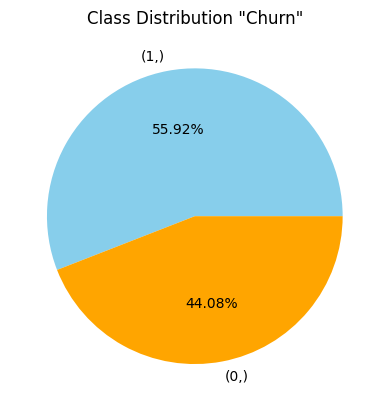

In [35]:
pd.DataFrame(y_train).value_counts().plot.pie(autopct='%1.2f%%', colors=['skyblue', 'orange'])
plt.title('Class Distribution "Churn"')
plt.ylabel('')
plt.show()

## Training XGBoost on the Training set

In [36]:
xgb_classifier = XGBClassifier(n_estimators=194, learning_rate=0.08011727992081952, max_depth=3)
#{'n_estimators': 138, 'learning_rate': 0.2910194858724226, 'max_depth': 8}

xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08011727992081952,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=194, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Confusion Matrix

In [37]:
y_pred = xgb_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[719 314]
 [ 80 294]]


0.7199715707178393

## K-Cross Validation

In [38]:
accuracies = cross_val_score(estimator = xgb_classifier, X = X_train, y = y_train, cv = 10) # number of folds
print(f"Accuracy: {round(accuracies.mean()*100, 2)} %")
print(f"Standard Deviation: {round(accuracies.std()*100, 2)} %") # for the variance

Accuracy: 95.65 %
Standard Deviation: 2.34 %


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.70      0.78      1033
           1       0.48      0.79      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.74      1407



In [ ]:
!pip install optuna

## Hyper Parameter Tuning

In [ ]:
import optuna
# from sklearn.metrics import accuracy_score

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
    }
    model = XGBClassifier(**params)
    # model.fit(X_train, y_train)
    # Evaluate on the test set
    # test_accuracy = accuracy_score(y_test, model.predict(X_test))
    # return test_accuracy
    return cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print(study.best_params)

### Trying Randomized Search

In [42]:
# param_dist = {
#     'learning_rate': [0.01, 0.1, 0.2, 0.3],
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 7, 9],
#     'min_child_weight': [1, 3, 5],
#     'subsample': [0.6, 0.8, 1.0]
# }

# random_search = RandomizedSearchCV(xgb_classifier, param_distributions=param_dist, n_iter=10, cv=3)
# random_search.fit(X_train, y_train)
# best_accuracy = random_search.best_score_
# best_parameters = random_search.best_params_
# print(f"Best Accuracy: {round(best_accuracy*100, 2)} %")
# print(f"Best Parameters: {best_parameters}")

## Training on CatBoost


In [43]:
cat_classifier = CatBoostClassifier(silent=True)
cat_classifier.fit(X_train, y_train)

In [44]:
y_pred = cat_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[732 301]
 [ 83 291]]


0.7270788912579957

In [45]:
accuracies = cross_val_score(estimator = cat_classifier, X = X_train, y = y_train, cv = 10) # number of folds
print(f"Accuracy: {round(accuracies.mean()*100, 2)} %")
print(f"Standard Deviation: {round(accuracies.std()*100, 2)} %") # for the variance

Accuracy: 96.63 %
Standard Deviation: 1.93 %


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1033
           1       0.49      0.78      0.60       374

    accuracy                           0.73      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.79      0.73      0.74      1407



In [47]:
# import optuna
# def objective(trial):
#     # Suggest values for the hyperparameters
#     iterations = trial.suggest_categorical('iterations', [500, 1000])
#     learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.2)
#     depth = trial.suggest_int('depth', 6, 10)
#     l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 1, 5)

#     cat_classifier = CatBoostClassifier(
#         iterations=iterations,
#         learning_rate=learning_rate,
#         depth=depth,
#         l2_leaf_reg=l2_leaf_reg,
#         verbose=0
#     )
#     return cross_val_score(cat_classifier, X_train, y_train, cv=5, scoring='accuracy').mean()
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)
# print(study.best_params)

In [48]:
# param_dist = {
#     'iterations': [500, 1000],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'depth': [6, 8, 10],
#     'l2_leaf_reg': [1, 3, 5]
# }

# random_search = RandomizedSearchCV(cat_classifier, param_distributions=param_dist, n_iter=10, cv=3)
# random_search.fit(X_train, y_train)
# best_accuracy = random_search.best_score_
# best_parameters = random_search.best_params_
# print(f"Best Accuracy: {round(best_accuracy*100, 2)} %")
# print(f"Best Parameters: {best_parameters}")

## Training KernelSVM on the Training set



In [49]:
svm_classifier = SVC(kernel = 'rbf', random_state = 0)
svm_classifier.fit(X_train, y_train)

SVC(random_state=0)

In [50]:
y_pred = svm_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[693 340]
 [ 80 294]]


0.7014925373134329

In [51]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svm_classifier, X = X_train, y = y_train, cv = 10) # number of folds
print(f"Accuracy: {round(accuracies.mean()*100, 2)} %")
print(f"Standard Deviation: {round(accuracies.std()*100, 2)} %") # for the variance

Accuracy: 94.29 %
Standard Deviation: 0.9 %


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1033
           1       0.46      0.79      0.58       374

    accuracy                           0.70      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.70      0.72      1407



In [53]:
# from sklearn.model_selection import GridSearchCV
# parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel' : ['linear']},
#               {'C': [0.25, 0.5, 0.75, 1], 'kernel' : ['rbf'], 'gamma' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}] # gamma parameter can only be used with the rbf kernel and not the linear one.
# grid_search = GridSearchCV(estimator = svm_classifier,
#                            param_grid = parameters,
#                            scoring = 'accuracy', # the metric with which you want to evaluate the performance of the model
#                            cv = 10, # number of trained test polls when applying k-fold cross validation
#                            n_jobs = -1) # number of cores to use
# grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_
# print(f"Best Accuracy: {round(best_accuracy*100, 2)} %")
# print(f"Best Parameters: {best_parameters}")

In [54]:
# def objective(trial):
#     # Suggest values for the hyperparameters
#     c = trial.suggest_loguniform('C', 1e-3, 1e3)  # Loguniform for C to cover a wide range
#     kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
#     degree = trial.suggest_int('degree', 2, 5) if kernel == 'poly' else 3  # Degree only relevant for 'poly'
#     gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])

#     # Create an SVC with suggested parameters
#     svc = SVC(C=c, kernel=kernel, degree=degree, gamma=gamma)

#     # Perform cross-validation and return the mean accuracy
#     score = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy').mean()
#     return score

# # Create and optimize the study
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)
# print(study.best_params)

## Training Logistic Regression on the Training set


In [55]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 0)
lr_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [56]:
y_pred = lr_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[651 382]
 [ 54 320]]


0.6901208244491827

In [57]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lr_classifier, X = X_train, y = y_train, cv = 10) # number of folds
print(f"Accuracy: {round(accuracies.mean()*100, 2)} %")
print(f"Standard Deviation: {round(accuracies.std()*100, 2)} %") # for the variance

Accuracy: 90.09 %
Standard Deviation: 1.16 %


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.63      0.75      1033
           1       0.46      0.86      0.59       374

    accuracy                           0.69      1407
   macro avg       0.69      0.74      0.67      1407
weighted avg       0.80      0.69      0.71      1407



In [59]:
# def objective(trial):
#     # Suggest values for the hyperparameters
#     c = trial.suggest_loguniform('C', 1e-3, 1e3)  # Regularization strength (log-uniform)
#     solver = trial.suggest_categorical('solver', ['liblinear', 'saga', 'lbfgs', 'newton-cg'])
#     max_iter = trial.suggest_int('max_iter', 100, 500)  # Maximum iterations
#     penalty = trial.suggest_categorical('penalty', ['l2', 'elasticnet'])  # Penalty type

#     # ElasticNet mixing parameter (only relevant if 'penalty' is 'elasticnet')
#     l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0) if penalty == 'elasticnet' else 0.5

#     # Create Logistic Regression with suggested parameters
#     logreg = LogisticRegression(
#         C=c,
#         solver=solver,
#         max_iter=max_iter,
#         penalty=penalty,
#         l1_ratio=l1_ratio,
#         multi_class='auto',
#         random_state=42
#     )

#     # Perform cross-validation and return the mean accuracy
#     score = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy').mean()
#     return score

# # Create and optimize the study
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)
# print(study.best_params)

## Training Random Forest on the Training set



In [60]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators= 220, max_depth=17, criterion= 'entropy', random_state= 0, min_samples_split=5, min_samples_leaf=1, max_features='sqrt')
rf_classifier.fit(X_train, y_train)
# {'n_estimators': 220, 'max_depth': 17, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt'}

RandomForestClassifier(criterion='entropy', max_depth=17, min_samples_split=5,
                       n_estimators=220, random_state=0)

In [61]:
y_pred = rf_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[717 316]
 [ 81 293]]


0.7178393745557925

In [62]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf_classifier, X = X_train, y = y_train, cv = 10) # number of folds
print(f"Accuracy: {round(accuracies.mean()*100, 2)} %")
print(f"Standard Deviation: {round(accuracies.std()*100, 2)} %") # for the variance

Accuracy: 96.43 %
Standard Deviation: 1.21 %


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1033
           1       0.48      0.78      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.73      1407



In [64]:
# import optuna
# #{'n_estimators': 220, 'max_depth': 17, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
# def objective(trial):
#     # Suggest values for the hyperparameters
#     n_estimators = trial.suggest_int('n_estimators', 50, 500)  # Number of trees
#     max_depth = trial.suggest_int('max_depth', 2, 20)  # Maximum depth of trees
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 20)  # Minimum samples to split a node
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)  # Minimum samples per leaf
#     max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])  # Number of features to consider for splits

#     # Create a RandomForestClassifier with suggested parameters
#     rf = RandomForestClassifier(
#         n_estimators=n_estimators,
#         max_depth=max_depth,
#         min_samples_split=min_samples_split,
#         min_samples_leaf=min_samples_leaf,
#         max_features=max_features,
#         random_state=42
#     )

#     # Perform cross-validation and return the mean accuracy
#     score = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy').mean()
#     return score

# # Create and optimize the study
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)
# print(study.best_params)

### Building an ANN

In [76]:
import tensorflow as tf
from tensorflow.keras.regularizers import l2
# Building the Network

model = tf.keras.models.Sequential(
    [
        tf.keras.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(units=256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(units=256, activation='relu', kernel_regularizer=l2(0.001)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(units=128, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ]
)

In [77]:
def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    ax[0].plot(epochs, acc, 'b', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training accuracy')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].legend()

    ax[1].plot(epochs, loss, 'b', label='Training Loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation Loss')
    ax[1].set_title('Training loss')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()

    plt.show()

In [78]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):

    # Define the correct function signature for on_epoch_end method
    def on_epoch_end(self, epoch, logs={}):

        # Check if the accuracy is greater or equal to 0.98
        if (logs.get("accuracy") >= 0.94):

            # Stop training once the above condition is met
            self.model.stop_training = True

            print("\nReached 94% accuracy so cancelling training!")

In [79]:
def plot_learning_rate(history):
    """
    Plot learning rate vs loss.
    """
    # Define the learning rate array
    lrs = 1e-8 * (10 ** (np.arange(len(history.history["loss"])) / 20))

    # Set the figure size
    plt.figure(figsize=(10, 6))

    # Set the grid
    plt.grid(True)

    # Plot the loss in log scale
    plt.semilogx(lrs, history.history["loss"])

    # Increase the tickmarks size
    plt.tick_params('both', length=10, width=1, which='both')

    # Set the plot boundaries
    plt.axis([1e-8, 8e-4, 0, 50])
    plt.ylim(0, 1.0)  # This would zoom the y-axis between 0 and 1.0


    # Draw the graph on screen
    plt.xlabel('Learning Rate')
    plt.ylabel('Loss')
    plt.title('Learning Rate vs Loss')
    plt.show()

In [80]:
def tuning_learn_rate(model, X_train, y_train, optimizer, loss, batch_size=64, epochs=100):
    """
    Tunes the learning rate using an exponential increase.

    Args:
        model (tf.keras.Model): The Keras model.
        X_train (np.array): Training features.
        y_train (np.array): Training labels.
        optimizer (tf.keras.optimizers): Optimizer to use.
        loss (str or tf.keras.losses.Loss): Loss function for the model.
        epochs (int): Number of epochs to tune learning rate.
        batch_size (int): The batch size for training.

    Returns:
        history (tf.keras.callbacks.History): Training history object.
    """
    # Convert the data into a TensorFlow Dataset
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    train_dataset = train_dataset.batch(batch_size)

    # Define the learning rate scheduler (exponential increase)
    lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
        lambda epoch: 1e-8 * 10**(epoch / 20)  # Exponential growth
    )

    # Compile the model with the optimizer and loss function
    model.compile(
        optimizer=optimizer,
        loss=loss
    )

    # Fit the model with the learning rate scheduler
    history = model.fit(train_dataset, epochs=epochs, callbacks=[lr_scheduler])
    return history

# Example usage
tuned_history = tuning_learn_rate(
    model, X_train, y_train, optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy'
)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 1.0233 - learning_rate: 1.0000e-08
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.0207 - learning_rate: 1.1220e-08
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.0322 - learning_rate: 1.2589e-08
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0249 - learning_rate: 1.4125e-08
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.0232 - learning_rate: 1.5849e-08
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.0188 - learning_rate: 1.7783e-08
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0324 - learning_rate: 1.9953e-08
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.0155 - learning_rate: 2.2387e-08
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0331 - learning_rate: 2.5119e-08
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0210 - learning_rate: 2.8184e-08
Epoch 11/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/s

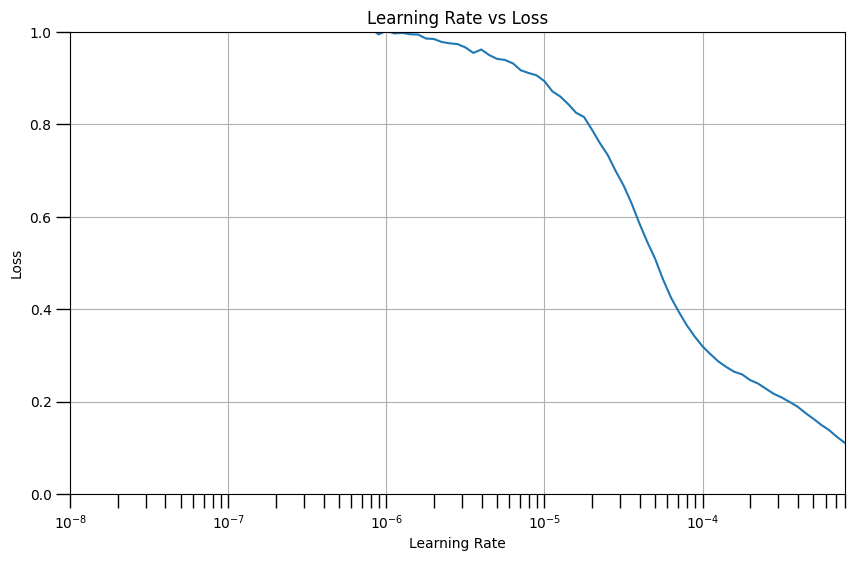

In [81]:
plot_learning_rate(tuned_history)

In [82]:
# Compiling the Network

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-4), loss='binary_crossentropy', metrics=['accuracy'])
# learning_rate=4e-4

In [83]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 256)                 │           7,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 107,777 (421.00 KB)

 Trainable params: 107,265 (419.00 KB)

 Non-trainable params: 512 (2.00 KB)

In [84]:
# Training the data on the network

history = model.fit(x=X_train, y=y_train, validation_split=0.2, batch_size=32, epochs=50, callbacks=[EarlyStoppingCallback()])

Epoch 1/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7858 - loss: 0.9670 - val_accuracy: 0.8571 - val_loss: 0.5272
Epoch 2/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8886 - loss: 0.4006 - val_accuracy: 0.8512 - val_loss: 0.4961
Epoch 3/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8983 - loss: 0.3592 - val_accuracy: 0.8897 - val_loss: 0.3633
Epoch 4/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9018 - loss: 0.3097 - val_accuracy: 0.8916 - val_loss: 0.3459
Epoch 5/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9086 - loss: 0.2991 - val_accuracy: 0.9005 - val_loss: 0.3372
Epoch 6/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9114 - loss: 0.2835 - val_accuracy: 0.9005 - val_loss: 0.3215
Epoch 7/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9239 - loss: 0.2501 - val_accuracy: 0.9015 - val_loss: 0.3110
Epoch 8/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9322 - loss: 0.2507 - val_accuracy: 0.

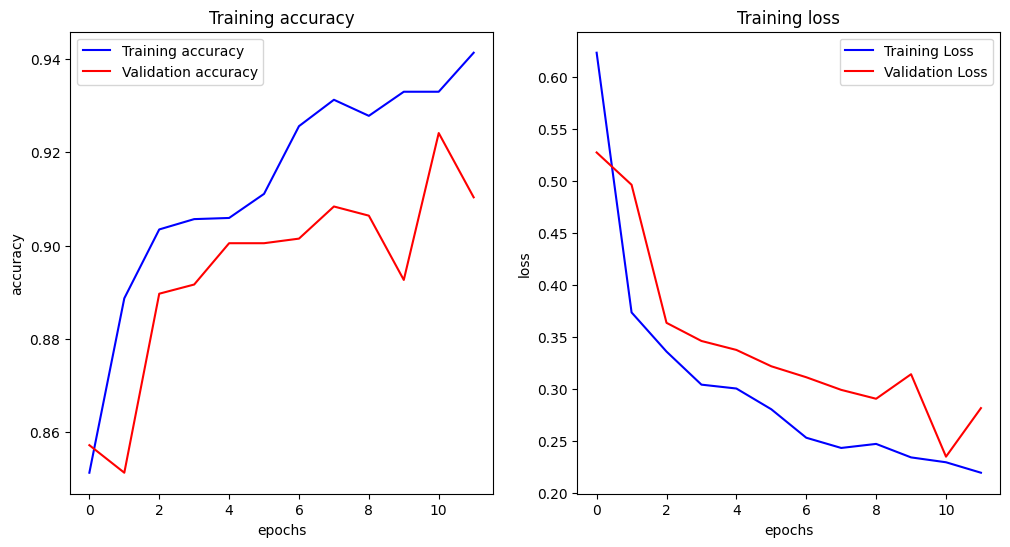

In [85]:
plot_loss_acc(history)

In [86]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(-1, 1), y_test.reshape(-1, 1)), 1))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[0 0]
 [0 0]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[735 298]
 [ 96 278]]
0.7199715707178393


In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79      1033
           1       0.48      0.74      0.59       374

    accuracy                           0.72      1407
   macro avg       0.68      0.73      0.69      1407
weighted avg       0.78      0.72      0.73      1407

